Importing Libraries

In [171]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import rcParams

Importing image and converting to native byte order for SEP - Image downloaded in code due to image downloading as corrupt when downloaded to my files then pulled

In [172]:

import urllib.request

url = "https://github.com/sep-developers/sep/raw/refs/heads/main/data/image.fits"
urllib.request.urlretrieve(url, "image_sep_tutorial.fits")
print("Downloaded image_sep_tutorial.fits")

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

with fits.open("image_sep_tutorial.fits") as hdul:
    data = hdul[0].data

data = np.ascontiguousarray(data, dtype=np.float32)

Downloaded image_sep_tutorial.fits


Image Display

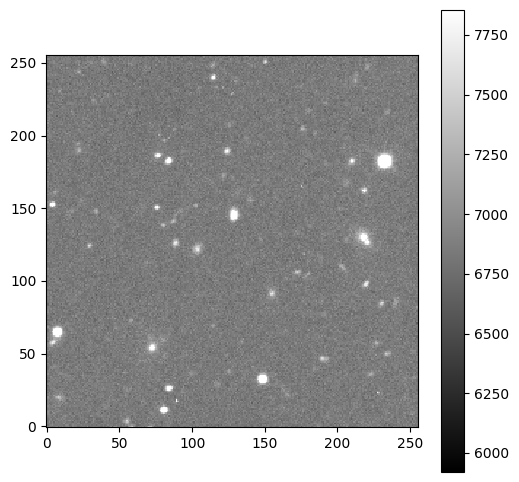

In [173]:
m, s = np.mean(data), np.std(data)

plt.figure(figsize=(6, 6))
plt.imshow(data, interpolation='nearest',
           cmap='gray',
           vmin=m-s,
           vmax=m+s,
           origin='lower')

plt.colorbar()
plt.savefig("data1.png")
plt.show()

Background Estimation

In [174]:
bkg = sep.Background(data)

print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


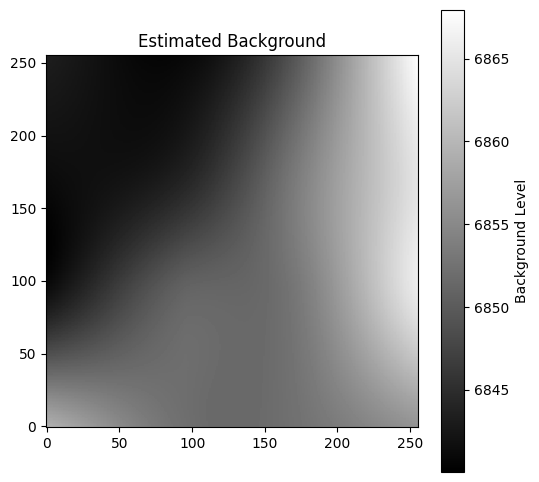

In [175]:
bkg_image = bkg.back()

plt.figure(figsize=(6, 6))
plt.imshow(bkg_image, interpolation='nearest',
           cmap='gray',
           origin='lower')
plt.colorbar(label="Background Level")
plt.title("Estimated Background")
plt.savefig("background1.png")
plt.show()

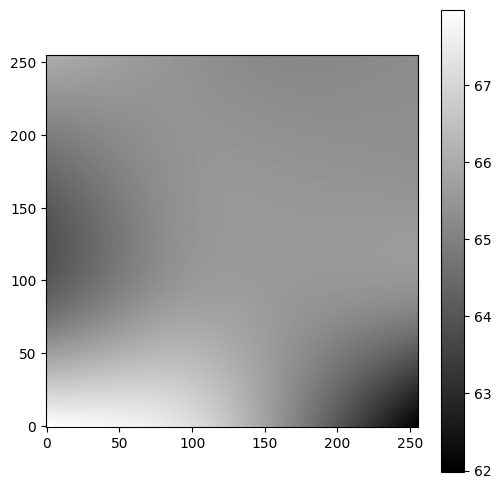

In [176]:
bkg_rms = bkg.rms()

plt.figure(figsize=(6, 6))
plt.imshow(bkg_rms, interpolation='nearest',
           cmap='gray',
           origin='lower')
plt.colorbar()
plt.savefig("backgroundNoise1.png")
plt.show()

In [177]:
data_sub = data - bkg


Extracting and Plotting Objects

In [178]:
objects = sep.extract(data_sub, thresh=1.5, err=bkg.globalrms)

print("Number of objects detected:", len(objects))

Number of objects detected: 69


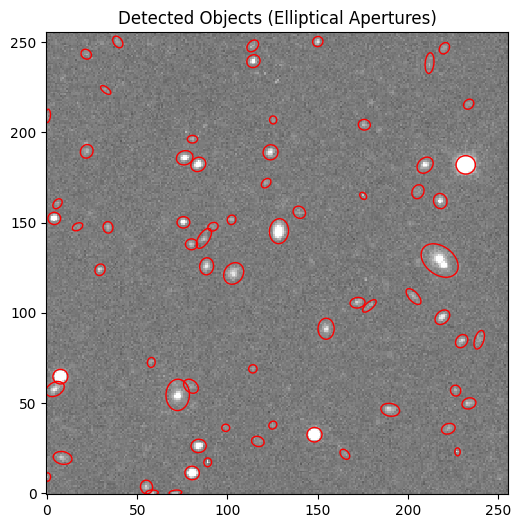

In [179]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(6, 6))

m, s = np.mean(data_sub), np.std(data_sub)

ax.imshow(
    data_sub,
    cmap='gray',
    interpolation='nearest',
    origin='lower',
    vmin=m - s,
    vmax=m + s
)

for obj in objects:
    ellipse = Ellipse(
        (obj['x'], obj['y']),
        width=6 * obj['a'],
        height=6 * obj['b'],
        angle=obj['theta'] * 180 / np.pi,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(ellipse)

plt.title("Detected Objects (Elliptical Apertures)")
plt.savefig("objects1.png")
plt.show()


Creating Table of First 10 objects in list. Completed after Performing Circular Aperture Photometry with 3 Pixel Fadius at Object Location

In [180]:
flux, fluxerr, flag = sep.sum_circle(
    data_sub,
    objects['x'],
    objects['y'],
    3.0,
    err=bkg.globalrms,
    gain=1.0
)

for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
